In [1]:
# All written code (function writing/calling, reading in data, plot creating, etc.) completed by the
# following group members (in and out of class time) as a team:
    # Dora Courtney
    # Lu Salamy
    # Samantha Wilder

In [2]:
# Import the necessary libraries
import matplotlib.pyplot as plt
import netCDF4 as nc
import numpy as np
import cartopy.crs as ccrs
import cartopy.feature as cfeature

In [3]:
# Create a function to open and read in daily mean temperature for NYC Central Park (2010) from a
# .txt file. Using the readlines command to make the output a list. (Exercise #1)
def read_text(file):
    with open(file, 'r') as data:
        sat = data.readlines()
    return sat

In [4]:
# Exercise #2
# Create a new function (lsq_fit) to calculate the model values and residual values, using the equations given
    # Function to compute y(t) and residuals (section added for Exercise #6 - 04/03)
    #(04/10)).
def lsq_fit(sat_nyc_2010):
    y_0 = 55.0  # degrees Fahrenheit
    T = 365.0   # days
    # Create matrix A for least-squares fitting
    A = np.zeros((len(sat_nyc_2010), 3))
    for t in range(1, 366):
        A[t-1, 0] = 1
        A[t-1, 1] = np.cos(2 * np.pi * (t - 200) / T)
        A[t-1, 2] = np.sin(2 * np.pi * (t - 200) / T)
    # Perform least-squares fit to estimate parameters
    x, _, _, _ = np.linalg.lstsq(A, sat_nyc_2010, rcond=None)
    # Compute pre-fit model values and residuals
    pre_fit_model_values = y_0 + 25 * np.cos(2 * np.pi * (np.arange(1, 366) - 200) / T)
    pre_fit_residuals = pre_fit_model_values - sat_nyc_2010
    # Compute post-fit model values and residuals
    post_fit_model_values = x[0] + x[1] * np.cos(2 * np.pi * (np.arange(1, 366) - 200) / T) + x[2] * np.sin(2 * np.pi * (np.arange(1, 366) - 200) / T)
    post_fit_residuals = post_fit_model_values - sat_nyc_2010
    # Return pre-fit and post-fit model values and residuals
    return pre_fit_model_values, pre_fit_residuals, post_fit_model_values, post_fit_residuals

In [5]:
# Print the observed NYC temperature to the screen (updated for Exercise #2 (02/21))
def print_data(day_of_year, sat_nyc_2010, pre_fit_model_values, pre_fit_residuals, post_fit_model_values, post_fit_residuals):
    print("{:<28} {:<28} {:<28} {:<28} {:<28} {:<28}".format("Day of Year (1-365)", "Observed Temperatures (\xb0F)", "Pre-fit Model (\xb0F)", "Pre-fit Residuals (\xb0F)", "Post-fit Model (\xb0F)", "Post-fit Residuals (\xb0F)"))

    for day, obs, pre_model, pre_residual, post_model, post_residual in zip(day_of_year, sat_nyc_2010, pre_fit_model_values, pre_fit_residuals, post_fit_model_values, post_fit_residuals):
        print("{:<28} {:<28.1f} {:<28.1f} {:<28.1f} {:<28.1f} {:<28.1f}".format(day, obs, pre_model, pre_residual, post_model, post_residual))

In [6]:
# Exercise #3
# We will plot the observed temperature with the day of year, as well as the residual values with the day
# of the year using a 'plot_ts' function (for Exercise #3)

# Create a function using plot_ts (time-series), so when data is fed into the function, it outputs 1 figure with 2 subplots, and saves this figure
def plot_ts(day_of_year, sat_nyc_2010, pre_fit_model_values, pre_fit_residuals, post_fit_model_values, post_fit_residuals):
    # First subplot ('Figure1'): 2 panel column, to plot the values passed through lsq_fit function (the pre-fit model values and residuals)
    plt.figure(figsize=(10, 8))

    # Top subplot: observations overlaid with pre-fit model values
    plt.subplot(2, 1, 1)
    plt.plot(day_of_year, sat_nyc_2010, label='Observations', color='orange', marker='.')
    plt.plot(day_of_year, pre_fit_model_values, label='Pre-fit Model', color='blue', linestyle='--', linewidth=2)
    # Add axis labels
    plt.xlabel('Day of Year (1-365)')
    plt.ylabel('Temperature (°F)')
    # Add a title
    plt.title('NYC Temperature Observations vs. Pre-fit Model Values over Day of Year (for 2010)')
    # Add a legend
    plt.legend()

    # Bottom subplot: pre-fit residuals
    plt.subplot(2, 1, 2)
    plt.plot(day_of_year, pre_fit_residuals, label='Pre-fit Residuals', color='green', marker='.')
    plt.axhline(0, color='gray', linestyle='--', linewidth=.75)
    # Add axis labels
    plt.xlabel('Day of Year (1-365)')
    plt.ylabel('Pre-fit Residuals (°F)')
    # Add a title
    plt.title('Pre-fit Residuals over Day of Year')
    
    plt.tight_layout()
    # Save the figure
    plt.savefig('Figure1.pdf')
    
    # Second subplot ('Figure3'): 2 panel column, to plot the values passed through lsq_fit function (the post-fit model values and residuals)
    plt.figure(figsize=(10, 8))

    # Top subplot: observations overlaid with pre-fit and post-fit model values
    plt.subplot(2, 1, 1)
    plt.plot(day_of_year, sat_nyc_2010, label='Observations', color='orange', marker='.')
    plt.plot(day_of_year, post_fit_model_values, label='Post-fit Model', color='red', linestyle='-.', linewidth=2)
    # Add axis labels
    plt.xlabel('Day of Year (1-365)')
    plt.ylabel('Temperature (°F)')
    # Add a title
    plt.title('NYC Temperature Observations vs. Post-fit Model Values over Day of Year (for 2010)')
    # Add a legend
    plt.legend()

    # Bottom subplot: post-fit residuals
    plt.subplot(2, 1, 2)
    plt.plot(day_of_year, post_fit_residuals, label='Post-fit Residuals', color='green', marker='.')
    plt.axhline(0, color='gray', linestyle='--', linewidth=.75)
    # Add axis labels
    plt.xlabel('Day of Year (1-365)')
    plt.ylabel('Post-fit Residuals (°F)')
    # Add a title
    plt.title('Post-fit Residuals over Day of Year')
    plt.tight_layout()
    
    # Save and show figures
    plt.savefig('Figure3.pdf')
    plt.show()

In [7]:
# Create a function for Exercise #4 (03/20) to read the NetCDF file and extract the SAT time series for the grid point closest to NYC Central Park.
def read_netcdf(file_path, lat_nyc=40.8, lon_nyc=286.0):
    nc_file = nc.Dataset(file_path, 'r')
    # Assign the latitude and longitude values to variable names
    lats = nc_file.variables['latitude'][:]
    lons = nc_file.variables['longitude'][:]
    # Find the closest gridpoint to central park using argument minimums between the known central park coordinate with the coordinates in the dataset
    lat_idx = np.argmin(np.abs(lats - lat_nyc))
    lon_idx = np.argmin(np.abs(lons - lon_nyc))
    # Pull out the temperature series from the closest gridpoint
    sat_time_series = nc_file.variables['SAT'][:, lat_idx, lon_idx]
    # Compute global mean SAT
    sat_global = np.mean(nc_file.variables['SAT'][:], axis=0)  # Compute mean over time
    # Convert SAT values from Kelvin to Fahrenheit
    sat_global_F = (sat_global - 273.15) * 1.8 + 32
    # Close the file
    nc_file.close()
    return sat_time_series, sat_global_F, lats, lons

In [8]:
# Exercise #5 - 03/27
# Using the time series of ERA5 surface air temperature (SAT) for the grid point closest to NYC (03/20 coding exercise), produce a histogram plot showing the
# probability density function of the annual-mean SAT.
    # The SAT should be converted to units of °F to be consistent with the units of temperature given in the other data file that we’ve worked with

# First define the function for plot_hist using the sat_time _series from (03/20)

def plot_hist(sat_time_series):
    sat_F = (sat_time_series - 273.15) * 1.8 + 32
    # Reshape the time series in groups of every 12 temperatures (set of 12-month values), average each grouping of 12 for annual averages
    annual_mean_sat = np.mean(sat_F.reshape(-1, 12), axis=1)
    plt.figure(figsize=(10, 8))
    plt.hist(annual_mean_sat, edgecolor='black', bins=np.arange(np.floor(np.min(annual_mean_sat)), np.ceil(np.max(annual_mean_sat))+0.5, 0.5), density=True)
    # Add axis labels
    plt.xlabel('NYC Annual-Mean Surface Air Temperature (°F)')
    plt.ylabel('Probability Density (°F$^{-1}$)')
    # Add a title
    plt.title('Probability Density Function of NYC Annual-Mean SAT')
    plt.tight_layout()
    # Save and show the figure
    plt.savefig('Figure2.pdf')
    plt.show()

In [9]:
# Exercise #7 - 04/17

def plot_map(global_F, lons, lats):
    # Create a map projection
    fig = plt.figure(figsize=(10, 6))
    ax = fig.add_subplot(1, 1, 1, projection=ccrs.Robinson())
    # Plot SAT data on the map
    color_levels = np.linspace(np.min(global_F), np.max(global_F), 100)  # Adjust the number of levels as needed
    im = ax.contourf(lons, lats, global_F, transform=ccrs.PlateCarree(), levels=color_levels, cmap='coolwarm')
    # Add coastlines
    ax.add_feature(cfeature.COASTLINE)
    # Add gridlines
    ax.gridlines()
    # Add colorbar
    cbar = plt.colorbar(im, label='Surface Air Temperature (°F)', orientation='vertical', shrink=0.5)
    # Add title
    plt.title('Climatological Annual Mean ERA5 Surface Air Temperature (1959-2021)')
    # Save the figure
    plt.savefig('Figure4.pdf')
    # Show the figure
    plt.show()

Day of Year (1-365)          Observed Temperatures (°F)   Pre-fit Model (°F)           Pre-fit Residuals (°F)       Post-fit Model (°F)          Post-fit Residuals (°F)     
1                            37.0                         31.0                         -6.0                         34.1                         -2.9                        
2                            26.0                         30.9                         4.9                          34.0                         8.0                         
3                            20.0                         30.8                         10.8                         33.9                         13.9                        
4                            25.0                         30.7                         5.7                          33.8                         8.8                         
5                            25.0                         30.6                         5.6                          33.8          

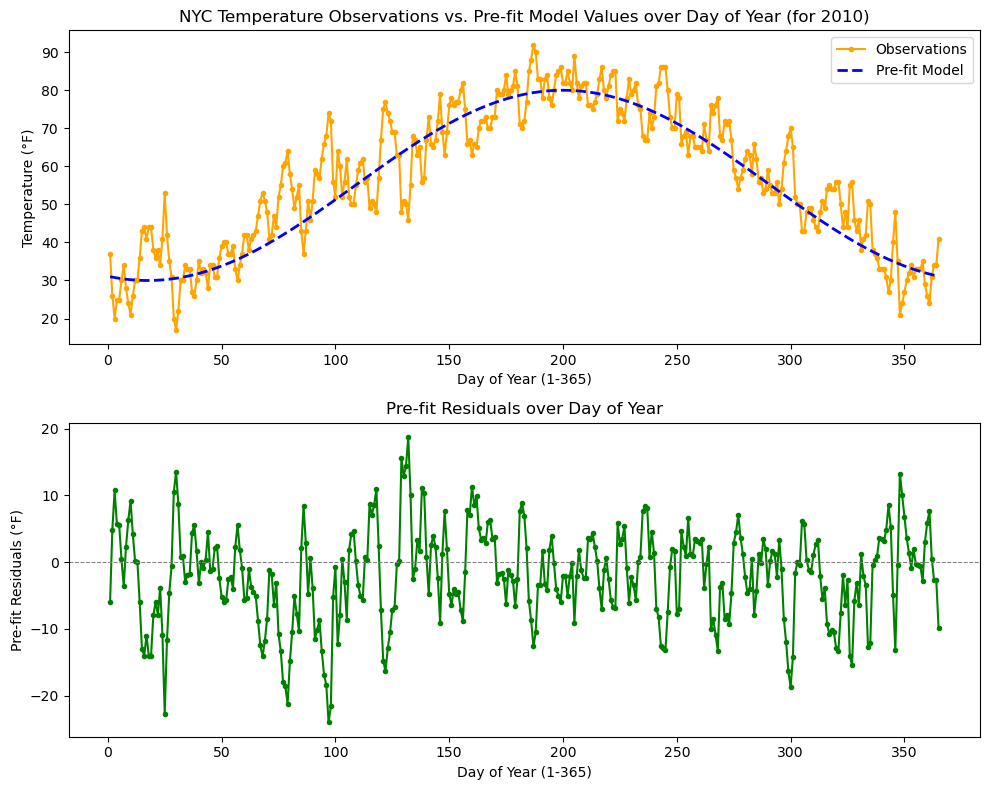

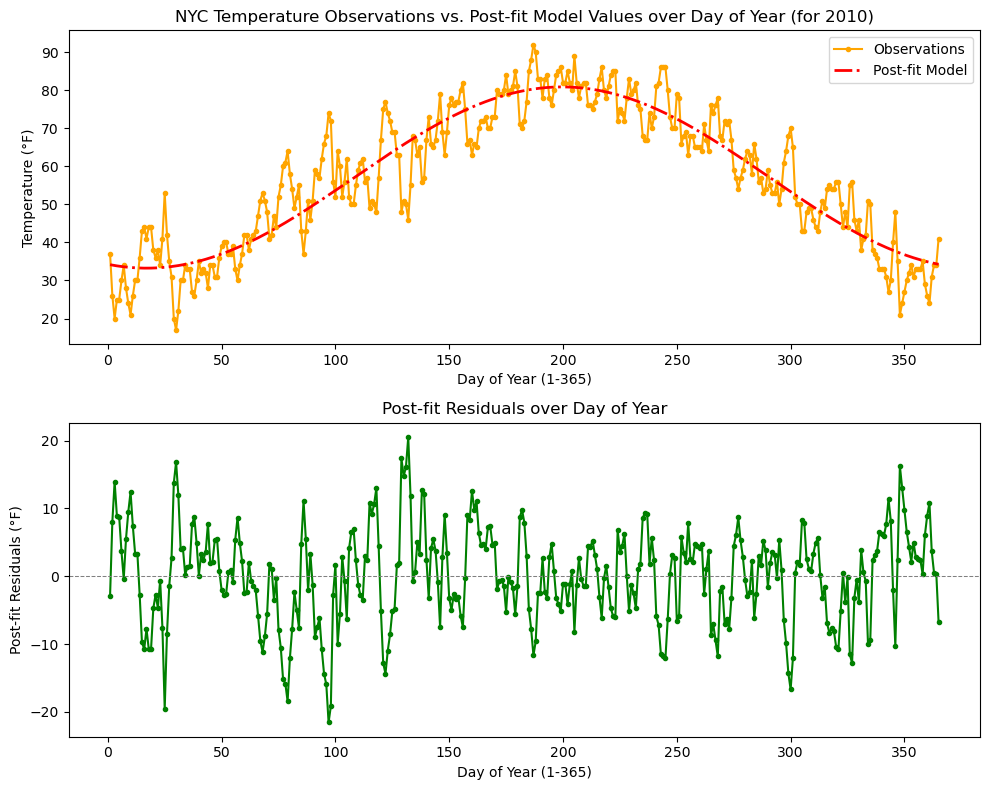

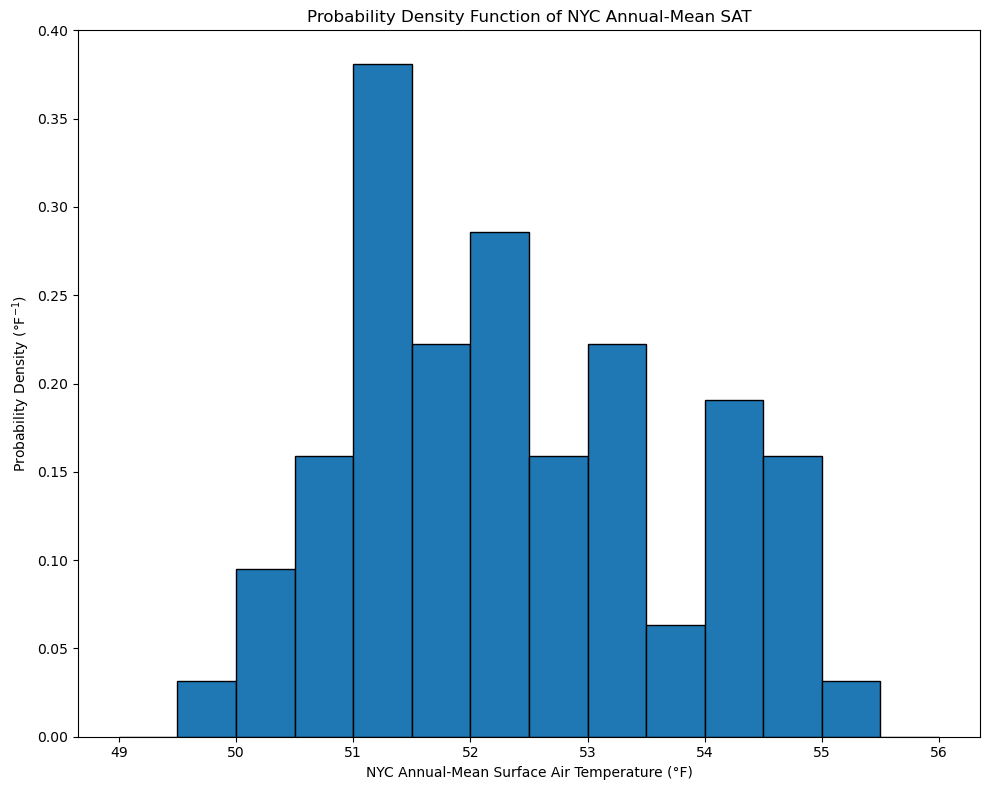

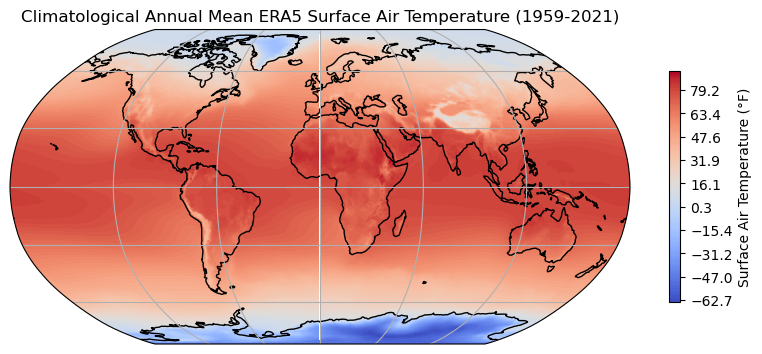

In [10]:
# Main Routine (updated for Exercise #7 (04/17))

# Specify the file name:
file_text = 'nyc_temp_2010.txt'
    # this text file contains the daily mean temperatures for NYC Central Park (2010)
    
# Now call the functions (read and print):
sat_nyc_2010 = read_text(file_text)
    # this function is passed the file name, reads in the temperature data, and returns the data

# Convert to integers
sat_nyc_2010 = [int(i) for i in sat_nyc_2010]


# Generate day_of_year list (1 to 365)
day_of_year = list(range(1, 366))

# Obtain pre-fit model values and residuals
pre_fit_model_values, pre_fit_residuals, post_fit_model_values, post_fit_residuals = lsq_fit(sat_nyc_2010)

# Print the data, now including pre-fit model values (3) and residuals (4) in addition to days of year (1) and observed
# temperatures (2) from Exercise #1 (02/14).
print_data(day_of_year, sat_nyc_2010, pre_fit_model_values, pre_fit_residuals, post_fit_model_values, post_fit_residuals)
    # this null function is passed the temperature data. The function prints to the screen four columns with headers:
        # - one column indicating the day of the year (1-365),
        # - and a second column indicating the temperature observation for each day.
    # Be sure to indicate the units of the temperature data (°F)

# Call the plotting (time-series) function and display/save the figure (for Exercise #3)
plot_ts(day_of_year, sat_nyc_2010, pre_fit_model_values, pre_fit_residuals, post_fit_model_values, post_fit_residuals)

# Using/calling the read_netCDF function, extract the SAT time series for the grid point closest to NYC Central Park (Exercise #4).
# Updated for Exercise #7 to extract entire global grid and average over time.
file_path = 'ERA5_SAT_195901-202112.nc'
sat_time_series, sat_global_F, lats, lons = read_netcdf(file_path)

# Commented out for the final submission (unused outputs - only used for checking code)
#print('SAT Time Series for NYC Central Park Closest Grid Point: ')
#print(sat_time_series)
#print(sat_global_F)

# Call the plotting histogram function and display/save the figure (for Exercise #5 - 03/27)
plot_hist(sat_time_series)

# Plot the global map
plot_map(sat_global_F, lons, lats)